In [1]:
# http://www.datascienceassn.org/sites/default/files/users/user1/lsa_presentation_final.pdf
# Latent Semantic Analysis (LSA) is a framework for analyzing text using matrices
# Find relationships between documents and terms within documents
# Used for document classification, clustering, text search, and more
# Lots of experts here at CU Boulder!

In [5]:
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,
module="pandas", lineno=570)
import numpy

In [10]:
from nltk.corpus import stopwords  
#stopword list to use
spanish_stopwords = stopwords.words('spanish')
#spanish stemmer
#stemmer = SnowballStemmer('spanish')

In [32]:
example2 = ["Machine learning is super fun",
"Python is super, super cool",
"Statistics is cool, too",
"Data science is fun",
"Python is great for machine learning",
"I like football",
           "Beer is good",
"Football is great to watch"]

example = ["El aprendizaje automático es super divertido ",
"Python es super, super genial",
"Las estadísticas también son geniales",
"La ciencia de los datos es divertido",
"Python es excelente para el aprendizaje automático",
"Me gusta el fútbol",
"La cerveza es buena",
"El fútbol es genial de ver"]

# vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
vectorizer = CountVectorizer(min_df = 1, stop_words = spanish_stopwords)
dtm = vectorizer.fit_transform(example)
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names
()).head(10)

,aprendizaje,automático,buena,cerveza,ciencia,datos,divertido,estadísticas,excelente,fútbol,genial,geniales,gusta,python,super,ver
El aprendizaje automático es super divertido,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
"Python es super, super genial",0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0
Las estadísticas también son geniales,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
La ciencia de los datos es divertido,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
Python es excelente para el aprendizaje automático,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
Me gusta el fútbol,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
La cerveza es buena,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
El fútbol es genial de ver,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


In [33]:
# Each row represents a document. Each column represents a word. So each document is a 13-dim vector.
# Each entry equals the number of times the word appears in the document
# Note: order and proximity of words in documents is NOT accounted for. Called a "bag of words" representation

# Get words that correspond to each column
vectorizer.get_feature_names()

['aprendizaje',
 'automático',
 'buena',
 'cerveza',
 'ciencia',
 'datos',
 'divertido',
 'estadísticas',
 'excelente',
 'fútbol',
 'genial',
 'geniales',
 'gusta',
 'python',
 'super',
 'ver']

In [34]:
# Example: "machine" appears once in the first document, "super" appears twice in the second document, and "statistics" appears zero times in the third document.

# Fit LSA. Use algorithm = “randomized” for large datasets
#lsa = TruncatedSVD(2, algorithm = 'arpack')
lsa = TruncatedSVD(2)
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [35]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,aprendizaje,automático,buena,cerveza,ciencia,datos,divertido,estadísticas,excelente,fútbol,genial,geniales,gusta,python,super,ver
component_1,0.332873,0.332873,7.390671e-18,7.151601e-18,0.035473,0.035473,0.224139,3.090083e-17,0.144207,0.055091,0.293011,3.089699e-17,0.007528,0.389654,0.67956,0.047564
component_2,-0.414707,-0.414707,4.561593e-17,3.713744e-17,-0.121362,-0.121362,-0.303436,4.140678e-16,-0.232633,0.315252,0.472959,4.139697e-16,0.090065,0.015139,0.31347,0.225187


In [36]:
pd.DataFrame(dtm_lsa, index = example, columns = ["component_1","component_2"
])

,component_1,component_2
El aprendizaje automático es super divertido,0.886460,-0.462806
"Python es super, super genial",0.877654,0.479295
Las estadísticas también son geniales,0.168568,0.985690
La ciencia de los datos es divertido,0.475345,-0.879799
Python es excelente para el aprendizaje automático,0.753432,-0.657526
Me gusta el fútbol,0.152682,0.988275
La cerveza es buena,0.233994,0.972238
El fútbol es genial de ver,0.363697,0.931517


In [37]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([0.88645982268503254,
  0.87765371142068904,
  0.16856810862101476,
  0.47534509061902414,
  0.75343151574957246,
  0.15268185447934446,
  0.23399352842276999,
  0.36369682057510633],
 [-0.46280555610884855,
  0.47929527728686189,
  0.98569000844887023,
  -0.87979943443059316,
  -0.65752638812088893,
  0.98827539244521734,
  0.97223815428950444,
  0.93151737649040056])

Populating the interactive namespace from numpy and matplotlib


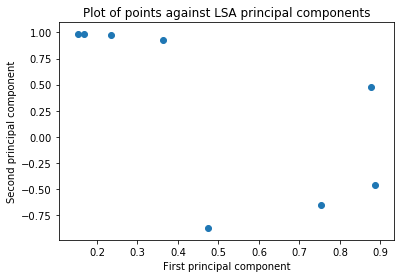

In [38]:
# Plot scatter plot of points
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
show()

Populating the interactive namespace from numpy and matplotlib


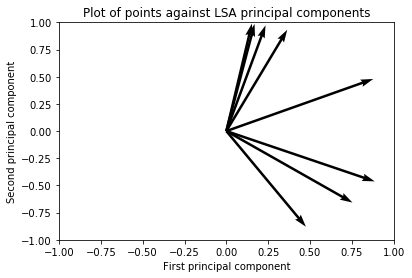

In [39]:
# Geometric picture
# Plot scatter plot of points with vectors
%pylab inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
plt.draw()
plt.show()
# We have reduced dimension from 13-dim to 2-dim (and have lost some info)
# Similar docs point in similar directions. Dissimilar docs have perpendicular (orthogonal) vectors. "Cosine
# similarity"
# Can use cosine similarity for search: which doc has the smallest angle with search term?

In [40]:
# Document similarity using LSA
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=example, columns=example).head(10)

,El aprendizaje automático es super divertido,"Python es super, super genial",Las estadísticas también son geniales,La ciencia de los datos es divertido,Python es excelente para el aprendizaje automático,Me gusta el fútbol,La cerveza es buena,El fútbol es genial de ver
El aprendizaje automático es super divertido,1.000000,0.556184,-0.306754,0.828550,0.972194,-0.322033,-0.242531,-0.108709
"Python es super, super genial",0.556184,1.000000,0.620381,-0.004495,0.346103,0.607678,0.671354,0.765672
Las estadísticas también son geniales,-0.306754,0.620381,1.000000,-0.787081,-0.521113,0.999870,0.997769,0.979495
La ciencia de los datos es divertido,0.828550,-0.004495,-0.787081,1.000000,0.936631,-0.796908,-0.744147,-0.646667
Python es excelente para el aprendizaje automático,0.972194,0.346103,-0.521113,0.936631,1.000000,-0.534782,-0.462974,-0.338477
Me gusta el fútbol,-0.322033,0.607678,0.999870,-0.796908,-0.534782,1.000000,0.996566,0.976126
La cerveza es buena,-0.242531,0.671354,0.997769,-0.744147,-0.462974,0.996566,1.000000,0.990759
El fútbol es genial de ver,-0.108709,0.765672,0.979495,-0.646667,-0.338477,0.976126,0.990759,1.000000


In [41]:
# Improvements and next steps:
# Vectorize with TFIDF (term-frequency inverse document-frequency: uses overall frequency of words to weight document-term matrix)
